# Predicting Subjective Sensations Of Distance Traveled

**Task:** get into the subjective sensation of the user as much as possible so that he agrees with your opinion that today he went 10,000 steps and this is unusual. Or today he went 6,000 and this is quite common.

**Criterion:** getting into the expectation of the average person about the work of the "smart" system, which looks at its data and decides that today is an ordinary or unusual day.

**Data Description:** we have records of the steps of one person for about 3 months. Each record is a certain period of time with a known number of steps in this interval.

---

## Problem Analysis

Importing basic libraries for exploration of the data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import datetime

In [2]:
TIME_FORMAT = "%Y-%m-%dT%H:%M:%S%f%z"

Getting dataset.

In [3]:
data = pd.read_csv("data.csv")
data.head()

,Time End,Time End Local Tz,Time Offset,Time Start,Time Start Local Tz,User ID,Value
0,2019-05-05T09:40:00+03:00,2019-05-05T12:40:00+03:00,10800,2019-05-05T09:39:59+03:00,2019-05-05T12:39:59+03:00,2166,1.0
1,2019-05-05T11:13:29+03:00,2019-05-05T14:13:29+03:00,10800,2019-05-05T11:12:51+03:00,2019-05-05T14:12:51+03:00,2166,34.0
2,2019-05-05T12:07:42+03:00,2019-05-05T15:07:42+03:00,10800,2019-05-05T12:07:39+03:00,2019-05-05T15:07:39+03:00,2166,1.0
3,2019-05-05T13:04:05+03:00,2019-05-05T16:04:05+03:00,10800,2019-05-05T13:04:02+03:00,2019-05-05T16:04:02+03:00,2166,3.0
4,2019-05-05T13:18:18+03:00,2019-05-05T16:18:18+03:00,10800,2019-05-05T13:18:13+03:00,2019-05-05T16:18:13+03:00,2166,6.0


Checking if we have only one user in dataset.

In [4]:
print("Number of users in the dataset = {}".format(len(data["User ID"].unique())))

Number of users in the dataset = 1


Yes, we have only one user, so we can drop column ```User ID```.

In [5]:
data = data.drop("User ID", axis = 1)
data.head()

,Time End,Time End Local Tz,Time Offset,Time Start,Time Start Local Tz,Value
0,2019-05-05T09:40:00+03:00,2019-05-05T12:40:00+03:00,10800,2019-05-05T09:39:59+03:00,2019-05-05T12:39:59+03:00,1.0
1,2019-05-05T11:13:29+03:00,2019-05-05T14:13:29+03:00,10800,2019-05-05T11:12:51+03:00,2019-05-05T14:12:51+03:00,34.0
2,2019-05-05T12:07:42+03:00,2019-05-05T15:07:42+03:00,10800,2019-05-05T12:07:39+03:00,2019-05-05T15:07:39+03:00,1.0
3,2019-05-05T13:04:05+03:00,2019-05-05T16:04:05+03:00,10800,2019-05-05T13:04:02+03:00,2019-05-05T16:04:02+03:00,3.0
4,2019-05-05T13:18:18+03:00,2019-05-05T16:18:18+03:00,10800,2019-05-05T13:18:13+03:00,2019-05-05T16:18:13+03:00,6.0


Also, we can see that there are two pairs of columns that depict the same information.

They are ``Time End`` ~ ```Time End Local Tz``` and ```Time Start``` ~ ```Time Start Local Tz``` pairs.

So, it makes sense to me that we should get rid of one of the column in every pair.

In [6]:
data = data[data.columns.difference(["Time End Local Tz", "Time Start Local Tz"])]
data.head()

,Time End,Time Offset,Time Start,Value
0,2019-05-05T09:40:00+03:00,10800,2019-05-05T09:39:59+03:00,1.0
1,2019-05-05T11:13:29+03:00,10800,2019-05-05T11:12:51+03:00,34.0
2,2019-05-05T12:07:42+03:00,10800,2019-05-05T12:07:39+03:00,1.0
3,2019-05-05T13:04:05+03:00,10800,2019-05-05T13:04:02+03:00,3.0
4,2019-05-05T13:18:18+03:00,10800,2019-05-05T13:18:13+03:00,6.0


Also, we have remaining columns in datetime format, so we can convert them for better use.

In [7]:
data["Time End"] = pd.to_datetime(data["Time End"])
data["Time Start"] = pd.to_datetime(data["Time Start"])
data.head()

,Time End,Time Offset,Time Start,Value
0,2019-05-05 09:40:00+03:00,10800,2019-05-05 09:39:59+03:00,1.0
1,2019-05-05 11:13:29+03:00,10800,2019-05-05 11:12:51+03:00,34.0
2,2019-05-05 12:07:42+03:00,10800,2019-05-05 12:07:39+03:00,1.0
3,2019-05-05 13:04:05+03:00,10800,2019-05-05 13:04:02+03:00,3.0
4,2019-05-05 13:18:18+03:00,10800,2019-05-05 13:18:13+03:00,6.0


Besides, ```Time Offset``` variable shows us timezone in seconds, so we won't get any new useful information from here.

In [8]:
data = data.drop("Time Offset", axis = 1)
data.head()

,Time End,Time Start,Value
0,2019-05-05 09:40:00+03:00,2019-05-05 09:39:59+03:00,1.0
1,2019-05-05 11:13:29+03:00,2019-05-05 11:12:51+03:00,34.0
2,2019-05-05 12:07:42+03:00,2019-05-05 12:07:39+03:00,1.0
3,2019-05-05 13:04:05+03:00,2019-05-05 13:04:02+03:00,3.0
4,2019-05-05 13:18:18+03:00,2019-05-05 13:18:13+03:00,6.0


It makes sense, to split datetime into different columns for better exploration.

In [9]:
date_end = data.apply(lambda row: row["Time End"].date(), axis=1)
time_end = data.apply(lambda row: row["Time End"].time(), axis=1)
date_start = data.apply(lambda row: row["Time Start"].date(), axis=1)
time_start = data.apply(lambda row: row["Time Start"].time(), axis=1)
vals = data["Value"]

data = pd.DataFrame({"date_start": date_start, "time_start": time_start, "date_end": date_end, "time_end": time_end, "value": vals})
data.head()

,date_start,time_start,date_end,time_end,value
0,2019-05-05,09:39:59,2019-05-05,09:40:00,1.0
1,2019-05-05,11:12:51,2019-05-05,11:13:29,34.0
2,2019-05-05,12:07:39,2019-05-05,12:07:42,1.0
3,2019-05-05,13:04:02,2019-05-05,13:04:05,3.0
4,2019-05-05,13:18:13,2019-05-05,13:18:18,6.0


Now, we will create new dataframe with values, grouped by date.

In [23]:
day_data = data.groupby(by="date_start", as_index=False).sum()

In [24]:
day_data.head()

,date_start,value
0,2019-05-01,21.0
1,2019-05-02,12956.0
2,2019-05-03,17003.0
3,2019-05-04,14312.0
4,2019-05-05,11124.0


As we can see, now we have a dataframe, which shows how many steps were made by user for each date.

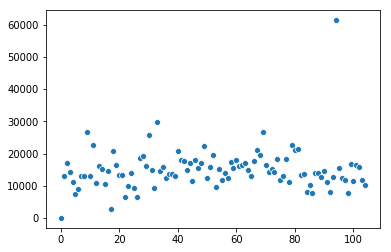

In [28]:
sns.scatterplot(data=day_data['value'])

We need to classify all the days by their _"usuality"_. We have only two states of each day: _"normal"_ and _"unusual"_. 

Also, we do not have initial answers of which days to consider _"unusual"_, so for this problem we should use unsupervised learning methods.

Our output labels are mutually exclusive (one day cannot be "normal" and "unusual" at the same time).

So, our only choice is to use one of the _exclusive clustering_ algorithms.'

Let's try to solve the problem with simple *k-means clustering*.